In [1]:
import numpy as np
import matplotlib.pyplot as plt
from polymer import Config, Polymer
import os
import time
import datetime

In [2]:
def plot_box(positions, l_box):
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')

    for i in range(len(positions)):
        ax.scatter(positions[i, 0],positions[i, 1], positions[i, 2])
    
    xy = np.array(((0,0),
                    (l_box, 0),
                    (l_box, l_box),
                    (0, l_box),
                    (0,0)), dtype="float64")
    xy -= l_box/2

    ax.plot(xy[:, 0], xy[:, 1], zs=-l_box/2, zdir='z', c="r")
    ax.plot(xy[:, 0], xy[:, 1], zs=l_box/2, zdir='z', c="r")
    ax.plot(xy[:, 0], xy[:, 1], zs=-l_box/2, zdir='y', c="r")
    ax.plot(xy[:, 0], xy[:, 1], zs=l_box/2, zdir='y', c="r")

In [3]:
# SET UP SYSTEM
cfg = Config.from_toml("/home/jan/Documents/masterthesis/project/mucus/cfg_structurefactor.toml")
p = Polymer(cfg)
p.create_box()

p.set_positions(p.positions+np.array((0.01, 0.01, 0.01)))

print("starting a simulation with following parameters:")
p.print_sim_info()

starting a simulation with following parameters:
steps = 200
stride = 1
number_of_beads = 40
nbeads = 10
nchains = 4
mobility = 1e-05
rbead = 1.0
qbead = 0.0
force_constant = 100.0
epsilon_LJ = 0.25
sigma_LJ = 2.0
cutoff_LJ = 2.0
lB_debye = 36.737
c_S = 10.0
cutoff_debye = 0.05
lbox = 20.0
pbc = True
cutoff_pbc = 3.0
save_traj = True
write_traj = True
cwd = '/home/jan/Documents/masterthesis/project/mucus'
dir_output = '/home/jan/Documents/masterthesis/project/results/structure_factor_2'
fname_traj = None
fname_sys = None
simulation_time = None



In [4]:
p.force_constant_nn

100.0

Position
[[ 6.67666667  1.01        6.67666667]
 [ 6.67666667  3.01        6.67666667]
 [ 6.67666667  5.01        6.67666667]
 [ 6.67666667  7.01        6.67666667]
 [ 6.67666667  9.01        6.67666667]
 [ 6.67666667 11.01        6.67666667]
 [ 6.67666667 13.01        6.67666667]
 [ 6.67666667 15.01        6.67666667]
 [ 6.67666667 17.01        6.67666667]
 [ 6.67666667 19.01        6.67666667]
 [13.34333333  1.01        6.67666667]
 [13.34333333  3.01        6.67666667]
 [13.34333333  5.01        6.67666667]
 [13.34333333  7.01        6.67666667]
 [13.34333333  9.01        6.67666667]
 [13.34333333 11.01        6.67666667]
 [13.34333333 13.01        6.67666667]
 [13.34333333 15.01        6.67666667]
 [13.34333333 17.01        6.67666667]
 [13.34333333 19.01        6.67666667]
 [ 1.01        6.67666667 13.34333333]
 [ 3.01        6.67666667 13.34333333]
 [ 5.01        6.67666667 13.34333333]
 [ 7.01        6.67666667 13.34333333]
 [ 9.01        6.67666667 13.34333333]
 [11.01        6

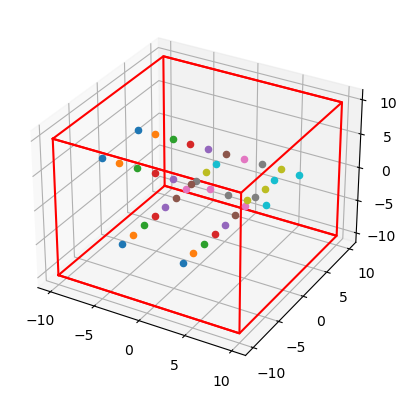

In [4]:
plot_box(p.positions-p.box_length/2, p.box_length)
p.get_forces_test(0)

In [38]:
p.print_sim_info()

steps = 200
stride = 1
number_of_beads = 40
nbeads = 10
nchains = 4
mobility = 1e-05
rbead = 1.0
qbead = 0.0
force_constant = 100.0
epsilon_LJ = 0.25
sigma_LJ = 2.0
cutoff_LJ = 2.0
lB_debye = 36.737
c_S = 10.0
cutoff_debye = 0.05
lbox = 20.0
pbc = True
cutoff_pbc = 3.0
save_traj = True
write_traj = True
cwd = '/home/jan/Documents/masterthesis/project/mucus'
dir_output = '/home/jan/Documents/masterthesis/project/results/structure_factor_2'
fname_traj = None
fname_sys = None
simulation_time = None



In [37]:
L_nn = list(())
for idx in p.idx_interactions:
    if np.any(np.logical_and(idx[0] == p.bonds[:, 0], idx[1] == p.bonds[:, 1])):
        print(idx)
        L_nn.append(True)
    else:
        L_nn.append(False)
        
print(p.distances[L_nn])

[0 1]
[1 0]
[1 2]
[2 1]
[2 3]
[3 2]
[3 4]
[4 3]
[4 5]
[5 4]
[5 6]
[6 5]
[6 7]
[7 6]
[7 8]
[8 7]
[8 9]
[9 8]
[10 11]
[11 10]
[11 12]
[12 11]
[12 13]
[13 12]
[13 14]
[14 13]
[14 15]
[15 14]
[15 16]
[16 15]
[16 17]
[17 16]
[17 18]
[18 17]
[18 19]
[19 18]
[20 21]
[21 20]
[21 22]
[22 21]
[22 23]
[23 22]
[23 24]
[24 23]
[24 25]
[25 24]
[25 26]
[26 25]
[26 27]
[27 26]
[27 28]
[28 27]
[28 29]
[29 28]
[30 31]
[31 30]
[31 32]
[32 31]
[32 33]
[33 32]
[33 34]
[34 33]
[34 35]
[35 34]
[35 36]
[36 35]
[36 37]
[37 36]
[37 38]
[38 37]
[38 39]
[39 38]
[29 28]
[28 29]
[39 38]
[38 39]
[9 8]
[8 9]
[19 18]
[18 19]
[29 28]
[28 29]
[39 38]
[38 39]
[29 28]
[28 29]
[39 38]
[38 39]
[9 8]
[8 9]
[19 18]
[18 19]
[9 8]
[8 9]
[19 18]
[18 19]
[9 8]
[8 9]
[19 18]
[18 19]
[29 28]
[28 29]
[39 38]
[38 39]
[29 28]
[28 29]
[39 38]
[38 39]
[9 8]
[8 9]
[19 18]
[18 19]
[ 2.          2.          2.          2.          2.          2.
  2.          2.          2.          2.          2.          2.
  2.          2.          2.  

In [29]:
print(p.positions[9::10])
print(p.distances[p.L_nn])

[[ 6.66666667 19.          6.66666667]
 [13.33333333 19.          6.66666667]
 [19.          6.66666667 13.33333333]
 [19.         13.33333333 13.33333333]]
[ 2.          2.          2.          2.          2.          2.
  2.          2.          2.          2.          2.          2.
  2.          2.          2.          2.          2.          2.
  2.          2.          2.          2.          2.          2.
  2.          2.          2.          2.          2.          2.
  2.          2.          2.          2.          2.          2.
  2.          2.          2.          2.          2.          2.
  2.          2.          2.          2.          2.          2.
  2.          2.          2.          2.          2.          2.
  2.          2.          2.          2.          2.          2.
  2.          2.          2.          2.          2.          2.
  2.          2.          2.          2.          2.          2.
 22.         22.         22.         22.         29.73213749 29

In [30]:
print(p.directions[p.L_nn])

[[  0.   2.   0.]
 [  0.  -2.   0.]
 [  0.   2.   0.]
 [  0.  -2.   0.]
 [  0.   2.   0.]
 [  0.  -2.   0.]
 [  0.   2.   0.]
 [  0.  -2.   0.]
 [  0.   2.   0.]
 [  0.  -2.   0.]
 [  0.   2.   0.]
 [  0.  -2.   0.]
 [  0.   2.   0.]
 [  0.  -2.   0.]
 [  0.   2.   0.]
 [  0.  -2.   0.]
 [  0.   2.   0.]
 [  0.  -2.   0.]
 [  0.   2.   0.]
 [  0.  -2.   0.]
 [  0.   2.   0.]
 [  0.  -2.   0.]
 [  0.   2.   0.]
 [  0.  -2.   0.]
 [  0.   2.   0.]
 [  0.  -2.   0.]
 [  0.   2.   0.]
 [  0.  -2.   0.]
 [  0.   2.   0.]
 [  0.  -2.   0.]
 [  0.   2.   0.]
 [  0.  -2.   0.]
 [  0.   2.   0.]
 [  0.  -2.   0.]
 [  0.   2.   0.]
 [  0.  -2.   0.]
 [  2.   0.   0.]
 [ -2.   0.   0.]
 [  2.   0.   0.]
 [ -2.   0.   0.]
 [  2.   0.   0.]
 [ -2.   0.   0.]
 [  2.   0.   0.]
 [ -2.   0.   0.]
 [  2.   0.   0.]
 [ -2.   0.   0.]
 [  2.   0.   0.]
 [ -2.   0.   0.]
 [  2.   0.   0.]
 [ -2.   0.   0.]
 [  2.   0.   0.]
 [ -2.   0.   0.]
 [  2.   0.   0.]
 [ -2.   0.   0.]
 [  2.   0.   0.]
 [ -2.   0

Position
[[ 6.6499786   0.99737291  6.67820287]
 [ 6.65519788  2.99436681  6.6770831 ]
 [ 6.66335615  4.99474907  6.71871116]
 [ 6.67712997  7.00100507  6.66368516]
 [ 6.65745447  9.01068271  6.66544917]
 [ 6.66818214 11.03223501  6.64288385]
 [ 6.70742745 13.02766405  6.68538945]
 [ 6.67092452 14.98177594  6.69479985]
 [ 6.69410275 17.00716571  6.70190006]
 [ 6.65943721 19.03003712  6.6717968 ]
 [13.32852683  0.99587034  6.67595951]
 [13.37472971  3.03299439  6.64086926]
 [13.29942461  4.99766266  6.66048555]
 [13.35155442  6.9765219   6.64754893]
 [13.33764929  9.00760127  6.65191204]
 [13.33995696 10.98981942  6.67160343]
 [13.35545952 12.994771    6.71921721]
 [13.34757216 15.02041182  6.66044483]
 [13.32079495 16.99538745  6.67287744]
 [13.37167671 18.98949661  6.64110578]
 [ 1.0160574   6.65208968 13.34093417]
 [ 3.01076172  6.6742681  13.35125265]
 [ 5.00434467  6.68101726 13.34773423]
 [ 6.99388658  6.68552232 13.33044188]
 [ 9.03366197  6.64916104 13.34326757]
 [10.97426373  6

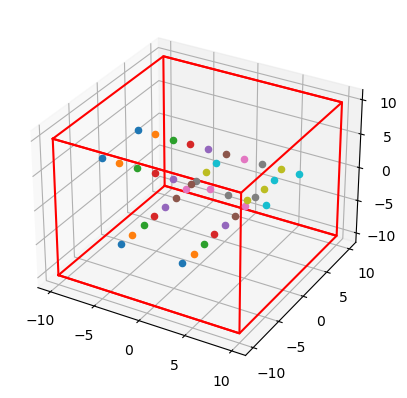

In [5]:
p.simulate(20)
p.get_forces_test(19)
plot_box(p.positions-p.box_length/2, p.box_length)

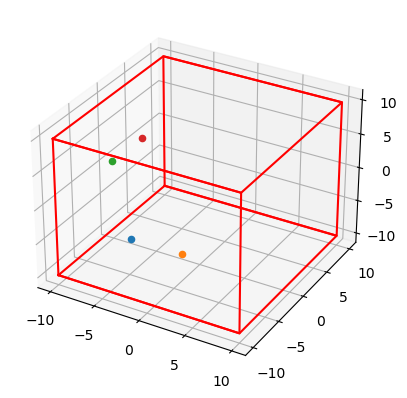

In [13]:
plot_box(p.positions[::10]-p.box_length/2, p.box_length)